## Capstone 1 
# San Francisco Bay Water Quality

ref. [Water quality of SF Bay home page](https://sfbay.wr.usgs.gov/access/wqdata/index.html)
     


## Unit 7 - Data Storytelling

### Tasks

Ask the following questions and look for the answers using code and plots:
   * Can you count something interesting?
   * Can you make a bar plot or a histogram?
   * Can you find trends (e.g. high, low, increasing, decreasing, anomalies)?
   * Can you make a scatterplot?
   * Can you make a time-series plot?
   * Can you compare two related quantities?

Looking at the plots, what are some insights you can make? Do you see any correlations? Is there a hypothesis you’d like to investigate further? What other questions do the insights lead you to ask?

## Data 

#### Files
   1. `SFBayWaterQuality.csv` - all water quality parameters
   2. `SFBayWaterQualityNutrientData.csv` - only nutrient data samples
   3. `water_quality_units.json` - units dictionary
   4. `SFBayStationLocations.csv` - sampling location information
   5. `station_stats.json` - by-station statistics
   5. `Phytoplankton.csv` - phytoplankton information


## Sampling stations

[Map](https://batchgeo.com/map/68e8afb69e93ec948b457d57c0589742) of sampling stations. Distance from station 36 has been computed. Additional details can be seen in the [interactive map](https://batchgeo.com/map/68e8afb69e93ec948b457d57c0589742).
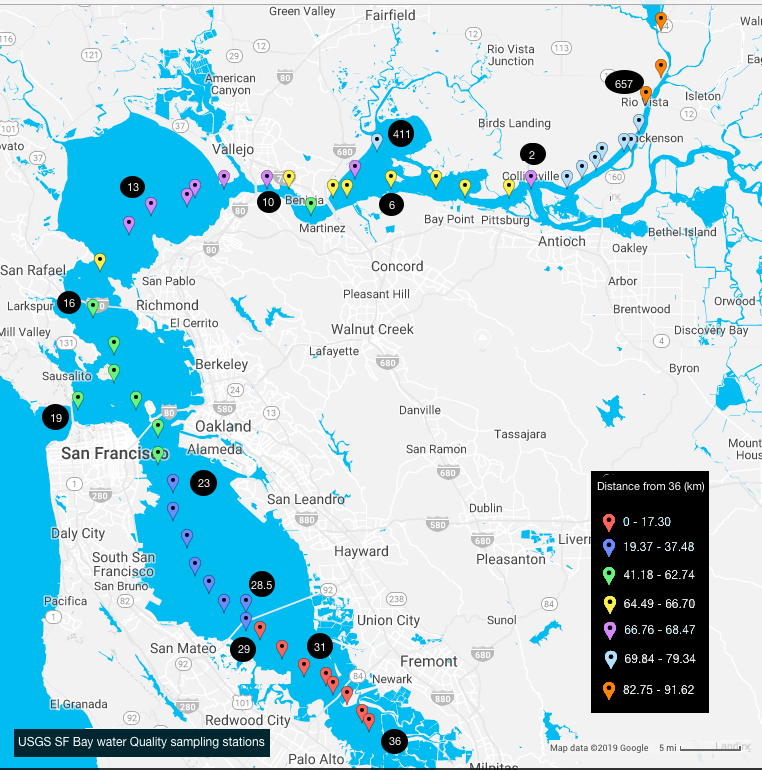
(built using [BatchGeo](https://batchgeo.com))

## Setup

Import libraries

In [1]:
# Import useful libraries

import csv
import json

import datetime
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


## Read in the data

In [2]:
# Read in the Water Quality data
wq_df = pd.read_csv('Data/SFBayWaterQualityPlus.csv', 
                    header=0, 
                    parse_dates=['DateTime', 'Date'],
                    dtype={'Station' : str}
                    )



In [3]:
# Dictionary of Water Quality parameters and units
with open('Data/water_quality_units.json', 'r') as f:
    wq_units = json.load(f)



In [4]:
# Stations are actually categories
wq_df['Station'] = pd.Categorical(wq_df['Station'])


In [5]:
# The sampling stations, in geographical order 
# from the Sacramento River south to San Jose

with open('Data/station_list.json', 'r') as fp:
    station_list = json.load(fp)


In [6]:
wq_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237061 entries, 0 to 237060
Data columns (total 23 columns):
Date                                 237061 non-null datetime64[ns]
Station                              237061 non-null category
Depth                                237061 non-null float64
DateTime                             237061 non-null datetime64[ns]
Distance from 36                     236597 non-null float64
Chlorophyll a/a+PHA                  12895 non-null float64
Fluorescence                         220308 non-null float64
Calculated Chlorophyll               225275 non-null float64
Oxygen Electrode Output              189908 non-null float64
Oxygen Saturation %                  191606 non-null float64
Calculated Oxygen                    188107 non-null float64
Calculated SPM                       200937 non-null float64
Measured Extinction Coefficient      13987 non-null float64
Calculated Extinction Coefficient    4772 non-null float64
Salinity                

### Can you count something interesting?

In [7]:
# Were some stations sampled more often?
sn = wq_df['Station']
sn_counts = sn.value_counts()

sn_counts_df = sn_counts.rename_axis('station').to_frame('frequency')

print("Number of stations sampled:", sn_counts.count())
print("median sampling frequency:", sn_counts.median())

print("\n")
print("lowest sampling frequency:\n", 
       sn_counts_df.loc[sn_counts_df.frequency == sn_counts.min()])
print("\n")
print("highest sampling frequency:\n", 
       sn_counts_df.loc[sn_counts_df.frequency == sn_counts.max()])



Number of stations sampled: 43
median sampling frequency: 4957.0


lowest sampling frequency:
          frequency
station           
655             32


highest sampling frequency:
          frequency
station           
18           16622


Stations are definitely not sampled at the same frequency.

(Chart below)

In [8]:
# How many different depths were sampled?
dp = wq_df['Depth']
dp_counts = dp.value_counts()


In [9]:
print("Number of depths sampled:", dp_counts.count())
print("shallowest depth", dp.min(), "meters; frequency", dp_counts[dp.min()])
print("deepest depth", dp.max(), "meters; frequency", dp_counts[dp.max()])

print("median depth", dp.median(), "meters")

Number of depths sampled: 99
shallowest depth 0.5 meters; frequency 1962
deepest depth 80.0 meters; frequency 2
median depth 7.0 meters


In [10]:
# How many actual days of sampling? 
# (We know the data covers 40 years, but not every day)
days_s = wq_df['Date']
days_counts = days_s.value_counts()


In [11]:
d1 = days_s.min().date()
d2 = days_s.max().date()
diff = (d2 - d1)

print("Number of days sampling occured:", days_counts.count())
print("Earliest date seen:", d1)
print("Latest date seen:", d2)
print("Days elapsed between these dates:", diff.days)

Number of days sampling occured: 1172
Earliest date seen: 1969-04-10
Latest date seen: 2019-06-04
Days elapsed between these dates: 18317


### Can you make a bar plot or a histogram?

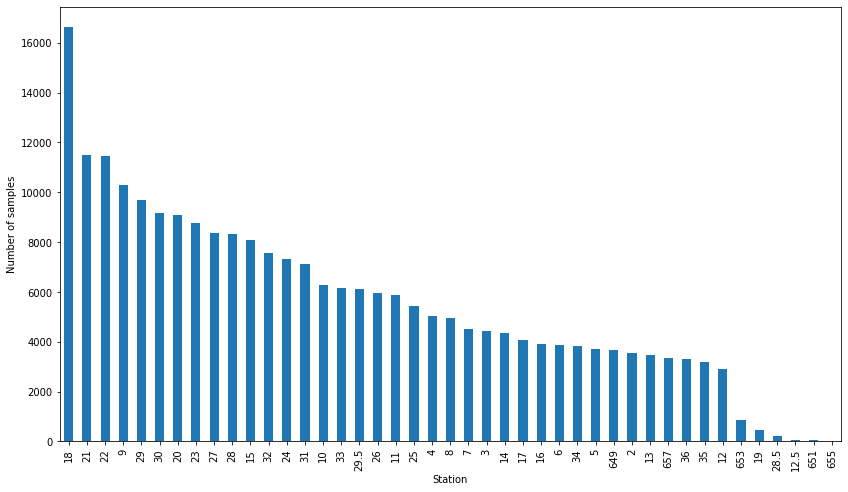

In [12]:
# Station sampling frequency plot

# Ordered by frequency, highest to lowest

ax = sn_counts.plot(kind="bar", figsize=(14,8), legend=False, use_index=True)

# Set the x-axis label
ax.set_xlabel("Station")

# Set the y-axis label
ax.set_ylabel("Number of samples")

plt.show()


In [13]:
# Re-order the counts by station, geographically
sn_counts_df.index = pd.Categorical(sn_counts_df.index, station_list)
sn_counts_df.sort_index(inplace=True)
sn_counts_df.head()


,frequency
657,3342
655,32
653,853
651,57
649,3672


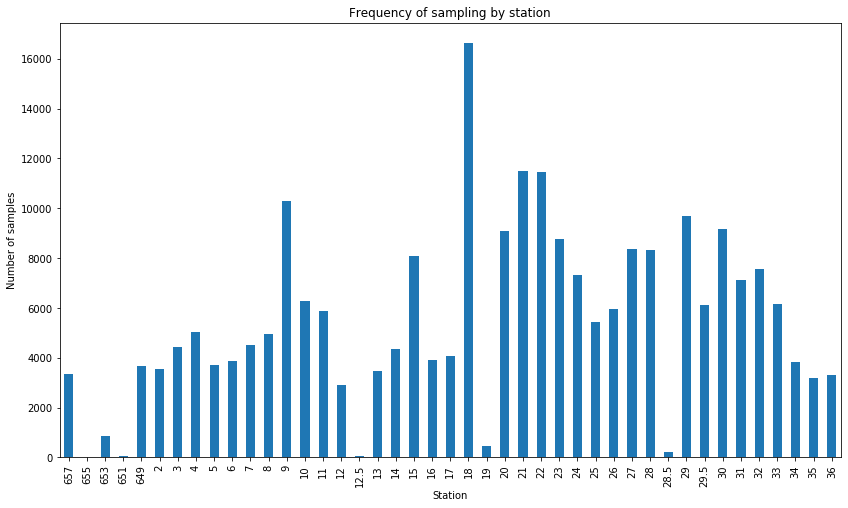

In [14]:
# Station sampling frequency plot
# ordered geographically

ax = sn_counts_df.plot(kind="bar", figsize=(14,8), legend=False, use_index=True)

# Set the x-axis label
ax.set_xlabel("Station")

# Set the y-axis label
ax.set_ylabel("Number of samples")

plt.title("Frequency of sampling by station")


plt.show()


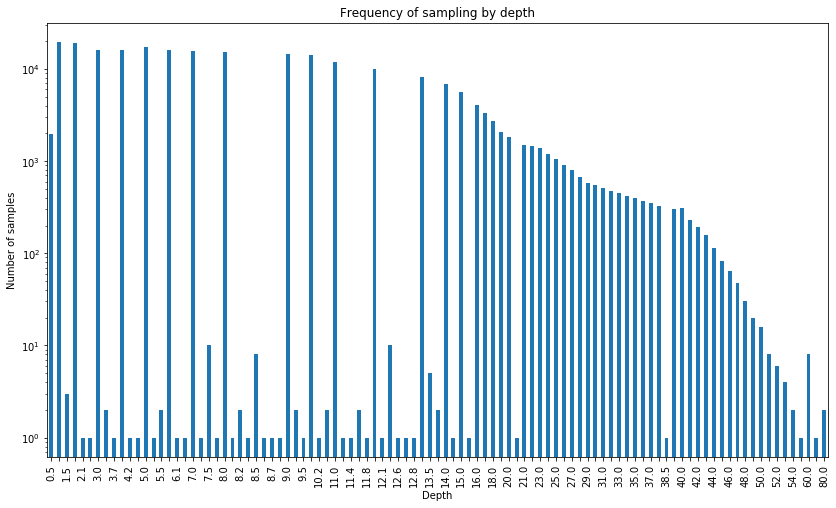

In [15]:
# Depth frequency bar plot  

wq_s = dp_counts.sort_index()

ax = wq_s.plot(kind="bar", figsize=(14,8), legend=False, logy=True)
last = ax.xaxis.get_ticklabels()[-1]

# Show every other tick label on X axis
n = 2  
[t.set_visible(False) for (i,t) in enumerate(ax.xaxis.get_ticklabels()) if i % n != 0]

# but ensure that the last X-axis tick label is visible
last.set_visible(True)

# Set the x-axis label (description)
ax.set_xlabel("Depth")

# Set the y-axis label
ax.set_ylabel("Number of samples")

plt.title("Frequency of sampling by depth")

plt.show()


While 99 different depths were recorded, many were sampled less than 100 times in 40 years.

Many of the shallower depths can be aggregated.

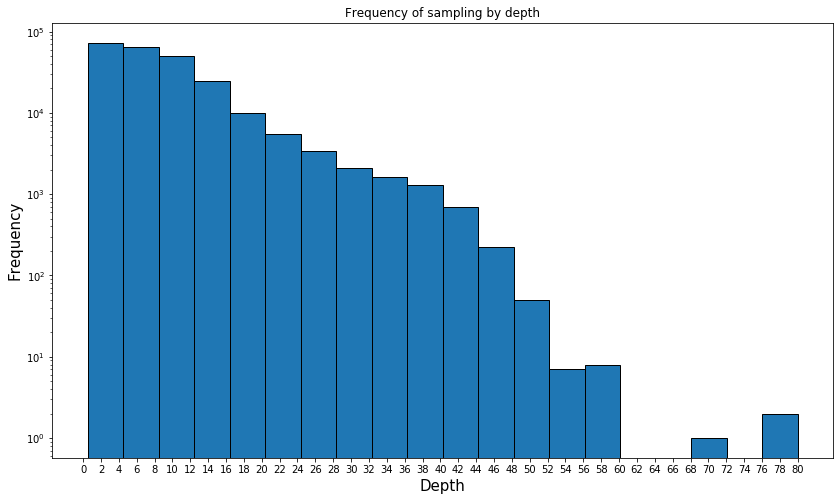

In [16]:
# Plot depth as histogram
wq_df.hist(column='Depth', bins=20, grid=False,
           figsize=(14,8), xlabelsize=10, edgecolor='k')
plt.yscale('log')
plt.xticks(range(0, 82, 2))
plt.xlabel("Depth", fontsize=15)
plt.ylabel("Frequency",fontsize=15)
plt.title("Frequency of sampling by depth")

plt.show()

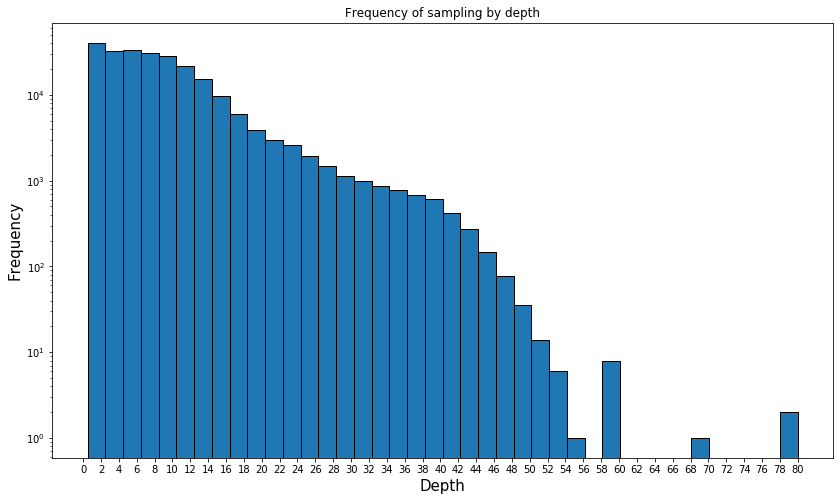

In [17]:
# Depth as histogram
wq_df.hist(column='Depth', bins=40, grid=False,
           figsize=(14,8), xlabelsize=10, edgecolor='k')
plt.yscale('log')
plt.xticks(range(0, 82, 2))
plt.xlabel("Depth", fontsize=15)
plt.ylabel("Frequency",fontsize=15)
plt.title("Frequency of sampling by depth")

plt.show()

I'd like to overlay the bar chart and the histogram, but I'm not sure how to do that.

However, conveniently, I can replicate the bar chart _as_ a histogram and overlaying two histograms on the same plot is relatively easy.

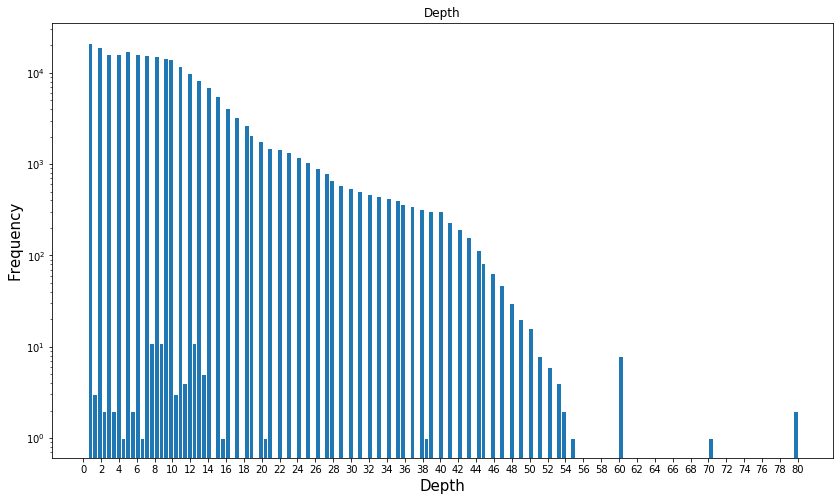

In [18]:
# Replicate bar chart as histogram 
#(define more bins than actual values; no samples will share a bin)

wq_df.hist(column='Depth', bins=150, grid=False,
           figsize=(14,8), xlabelsize=10, edgecolor='w')
plt.yscale('log')
plt.xticks(range(0, 82, 2))
plt.xlabel("Depth", fontsize=15)
plt.ylabel("Frequency",fontsize=15)

plt.show()

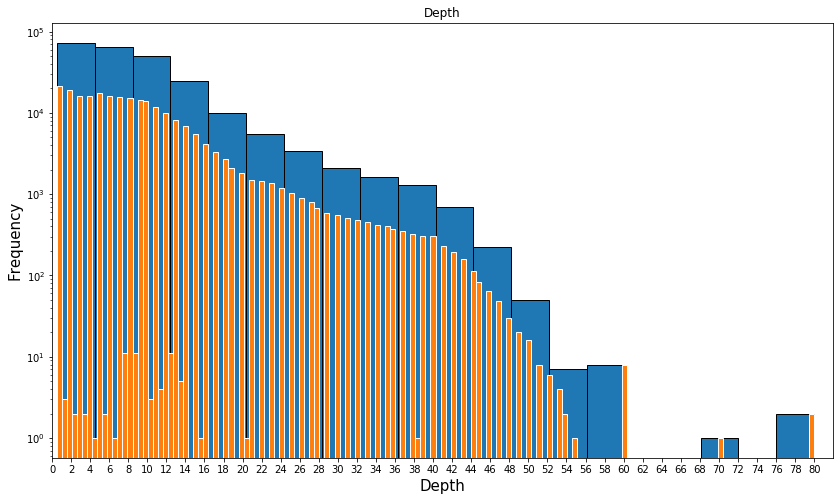

In [19]:
# Overlay pseudo bar chart on histogram
fig, ax = plt.subplots(figsize=(14,8))
ax.set_yscale('log')
wq_df.hist(column='Depth', bins=20, grid=False,
            xlabelsize=10, edgecolor='k', ax=ax)
wq_df.hist(column='Depth', bins=150, grid=False,
            xlabelsize=10, edgecolor='w',  ax=ax)
plt.xlabel("Depth", fontsize=15)
plt.ylabel("Frequency",fontsize=15)
plt.xlim([0,82])
plt.xticks(range(0,82,2))
plt.show()

### Can you find trends (e.g. high, low, increasing, decreasing, anomalies)?

Let's look at salinity differences by station.

Start by extracting only records for winter months, {Dec, Jan, Feb}.

In [20]:
# Extract data for Winter months: December, January, February

mask = ((wq_df['DateTime'].dt.month == 12) | (wq_df['DateTime'].dt.month <= 2))
df_jan = wq_df.loc[mask]
df_jan.reset_index(inplace=True, drop=True)
df_jan.shape

(52886, 23)

In [21]:
def summary_stats(s, param):
    """ 
    Calculate and reurn a dictionary of summary statistics 
    for a series or list: s 
    
    Parameters:
      s: Series or list
      param = string; the name of the parameter we're calculating over

    Returns: a dictionary of satistics for the series 
    """
    
    stats = {
      'parameter': param,
      'count': 0,
      'max': 0,
      'min': 0,
      'mean': 0,
      'median': 0,
      'mode': 0,
      'std': 0,
      'z': (0,0)
    }
    
    stats['count'] = s.count()
    stats['max'] = s.max()
    stats['min'] = s.min()
    stats['mean'] = round(s.mean(),3)
    stats['median'] = s.median()
    stats['mode'] = s.mode()[0]
    stats['std'] = round(s.std(),3)

    
    std3 = 3* stats['std']
    low_z = round(stats['mean'] - (std3),3)
    high_z = round(stats['mean'] + (std3),3)
    stats['z'] = (low_z, high_z)
        
    return(stats)
    
#end_def summary_stats


def stat_stations(df, col):
    """
    Set up a loop to call summary_stats for each station
    for the given parameter, col, exracting all records from
    the DataFrame, df.
    
    Parameters:
      df: DataFrame
      col: the name of the column in the DataFrame to select
    
    Returns: a dictionary of statistics for all stations
    """
    station_stats = {}
    idx=0
    for station in station_list:
        station_stats[idx] = {}
        station_stats[idx]["Station"] = station

        # Extract only records for this station
        st_df = df[df['Station'] == station]
       
        # Extract rows where col is not NaN
        d = st_df.loc[st_df[col].notnull()]
        s=d[col] # The column we want to look at 

        if(s.size < 10):
            # print("Not enough data to compute statistics: count =", s.size)
            continue

        stats = summary_stats(s, col)
        
        station_stats[idx].update(stats)
        idx += 1

    #end
    return(station_stats)
#end_def stat_stations

```
Out[ ]:  {0: {'Station': '657',
  'parameter': 'Salinity',
  'count': 853,
  'max': 1.74,
  'min': 0.02,
  'mean': 0.166,
  'median': 0.1,
  'mode': 0.08,
  'std': 0.222,
  'z': (-0.5, 0.832)},
 1: {'Station': '653',
  'param': 'Salinity',
  ...
  ...},
  40: {'Station': '36',
  'parameter': 'Salinity',
  'count': 728,
  'max': 30.88,
  'min': 3.2,
  'mean': 21.461,
  'median': 23.61,
  'mode': 26.89,
  'std': 6.145,
  'z': (3.026, 39.896)}}
```

In [22]:
# For each station, calculate statistics on Salinity across all 
# winter samples, regardless of depth.

station_stats = stat_stations(df_jan, 'Salinity')


In [23]:
salinity_jan_df = pd.DataFrame.from_dict(station_stats, orient='index')
salinity_jan_df.Station = pd.Categorical(salinity_jan_df.Station, station_list)
salinity_jan_df.head()


,Station,parameter,count,max,min,mean,median,mode,std,z
0,657,Salinity,853,1.74,0.02,0.166,0.10,0.08,0.222,"(-0.5, 0.832)"
1,653,Salinity,216,3.43,0.07,0.752,0.22,0.10,0.982,"(-2.194, 3.698)"
2,649,Salinity,920,8.53,0.05,1.690,0.57,0.07,2.122,"(-4.676, 8.056)"
3,2,Salinity,843,11.07,0.04,2.566,0.94,0.07,2.945,"(-6.269, 11.401)"
4,3,Salinity,1064,12.75,0.00,3.136,1.30,0.08,3.429,"(-7.151, 13.423)"


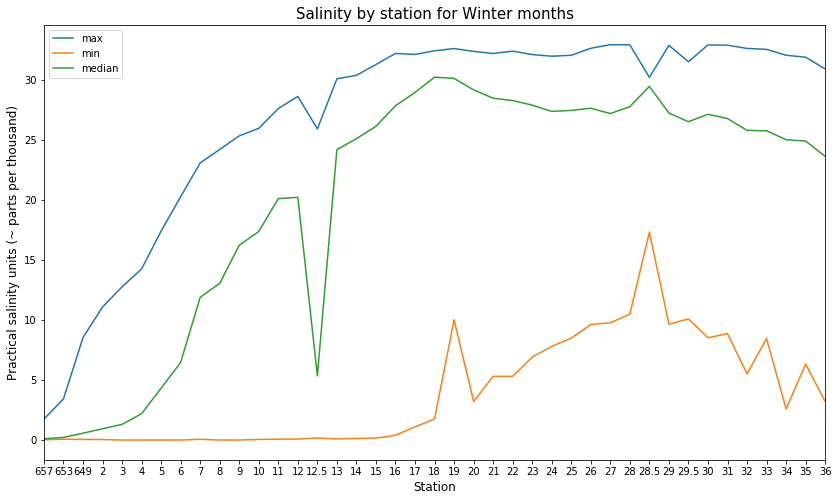

In [24]:
stations_sampled = list(salinity_jan_df.Station)
fig, ax = plt.subplots(figsize=(14,8))
salinity_jan_df.plot(x='Station', y='max', ax=ax)
salinity_jan_df.plot(x='Station', y='min', ax=ax)
salinity_jan_df.plot(x='Station', y='median', ax=ax)
plt.xticks(np.arange(len(stations_sampled)))
ax.set_xticklabels(stations_sampled)
plt.xlabel("Station", fontsize=12)
plt.ylabel("Practical salinity units (~ parts per thousand)",fontsize=12)
plt.title('Salinity by station for Winter months',fontsize=15)

plt.show()

There is a large anomaly at station 12.5 and a smaller one at 28.5. (Note that when I only checked January samples, the station 28.5 anomaly was much larger; the max, min, and median values were almost identical for 16 samples during all Januarys.)

These stations warrant further investigation

In [25]:
salinity_jan_df[salinity_jan_df.Station == '12.5']

,Station,parameter,count,max,min,mean,median,mode,std,z
14,12.5,Salinity,14,25.89,0.17,11.848,5.345,0.17,11.884,"(-23.804, 47.5)"


In [26]:
salinity_jan_df[salinity_jan_df.Station == '28.5']

,Station,parameter,count,max,min,mean,median,mode,std,z
31,28.5,Salinity,43,30.18,17.3,25.448,29.43,29.47,5.898,"(7.754, 43.142)"


Now, let's plot salinity by station for summer months.

In [27]:
# Extract data for summer

mask = ((wq_df['DateTime'].dt.month >5) & (wq_df['DateTime'].dt.month <8))
df_jul = wq_df.loc[mask]
df_jul.reset_index(inplace=True, drop=True)
df_jul.shape

(34420, 23)

In [28]:
# For each station, calculate statistics on Salinity across  
# summer samples, regardless of depth.

station_stats = stat_stations(df_jul, 'Salinity')


In [29]:
salinity_jul_df = pd.DataFrame.from_dict(station_stats, orient='index')
salinity_jul_df.Station = pd.Categorical(salinity_jul_df.Station, station_list)
salinity_jul_df.head()


,Station,parameter,count,max,min,mean,median,mode,std,z
0,657,Salinity,519,0.90,0.00,0.104,0.070,0.06,0.120,"(-0.256, 0.464)"
1,653,Salinity,127,2.39,0.01,0.439,0.190,0.06,0.600,"(-1.361, 2.239)"
2,651,Salinity,10,0.45,0.03,0.299,0.340,0.31,0.144,"(-0.133, 0.731)"
3,649,Salinity,569,5.02,0.06,0.893,0.360,0.06,1.202,"(-2.713, 4.499)"
4,2,Salinity,570,8.00,0.06,1.823,1.425,0.06,1.845,"(-3.712, 7.358)"


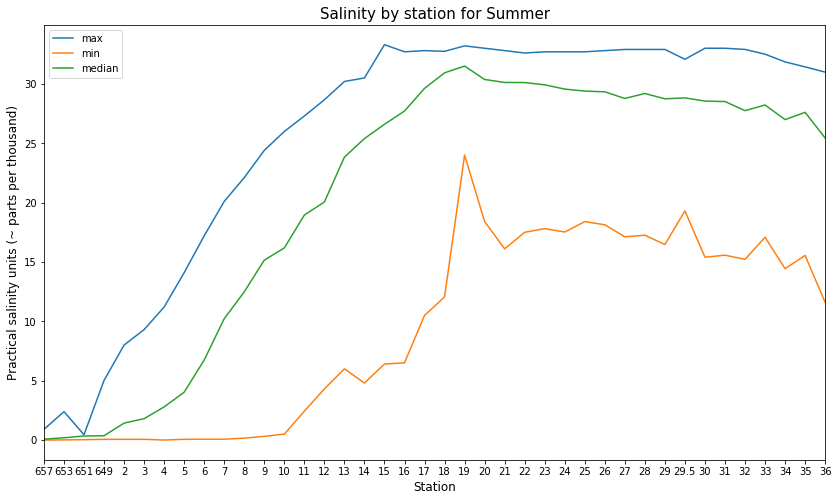

In [30]:
stations_sampled = list(salinity_jul_df.Station)
fig, ax = plt.subplots(figsize=(14,8))
salinity_jul_df.plot(x='Station', y='max', ax=ax)
salinity_jul_df.plot(x='Station', y='min', ax=ax)
salinity_jul_df.plot(x='Station', y='median', ax=ax)
plt.xticks(np.arange(len(stations_sampled)))
ax.set_xticklabels(stations_sampled)
plt.xlabel("Station", fontsize=12)
plt.ylabel("Practical salinity units (~ parts per thousand)",fontsize=12)
plt.title('Salinity by station for Summer', fontsize=15)

plt.show()

As I would have guessed, salinity is lowest in the Sacramento River. It climbs steadily as the water heads through Suisun Bay and San Pablo Bay and peaks in the Central Bay at the Golden Gate. Salinity then remains high south to San Jose.

Maximum salinity doesn't seem to change much between winter and summer. However, minimum salinity is much lower in the winter months, probably due to rain and storms.

In both seasons, minimum salinity is always higher at stations 18, 19, and 20, just inside the Golden Gate.

###   Can you make a scatterplot?


During the data wrangling phase, I made a scatterplot of nutrients sampled by depth . 

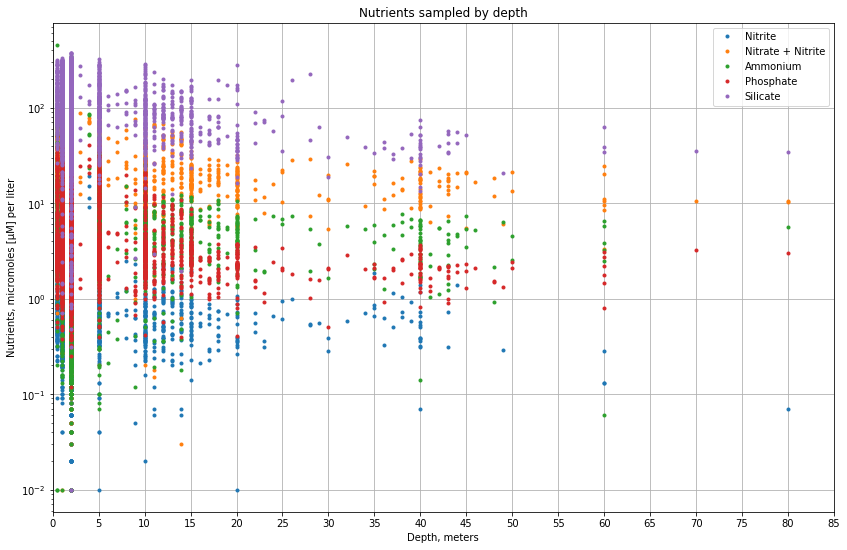

In [31]:
# Nutrients by depth

nutrient_df = wq_df.loc[:,['Depth', 'Nitrite',  'Nitrate + Nitrite', 
                           'Ammonium', 'Phosphate', 'Silicate']
                       ].sort_values('Depth'
                       ).reindex()

xticks=(range(0,100,5))
ax = nutrient_df.plot(x='Depth', linestyle='none', marker='.', logy=True, 
                      figsize=(14,9), xticks=xticks)
# Set the x scale 
ax.set_xlim((0, 85))

# Set the x-axis label
ax.set_xlabel("Depth, meters")

# Set the y-axis label
ax.set_ylabel("Nutrients, micromoles [µM] per liter")

ax.grid(True)

plt.title("Nutrients sampled by depth")
plt.show()

### Can you make a time-series plot?

For three stations, plot salinity and temperature across all years sampled

The stations chosen are 657 (at the Sacramento River), 18 (at the mouth of the Golden Gate), and 36 (at San Jose, the southern-most station).


In [32]:
def plot_one_var(df, var, **kwargs):
    """ 
    Plot one variable against time 
    
    Parameters
      df: a DataFrame of variables by date
      var: the variable to plot
    """
    ax = df.plot(x='DateTime', linestyle='none', marker='.',  
                figsize=(14,8), legend=False)
    # Set the x-axis label
    ax.set_xlabel("Date")

    # Set the y-axis label
    ylabel = var + ' ' + wq_units[var]
    ax.set_ylabel(ylabel)
    
    if 'ylim' in kwargs.keys():
        ax.set_ylim(kwargs['ylim'])

    plt.show()
#end_def plot_one_var


Station: 657
Changes in Salinity by year


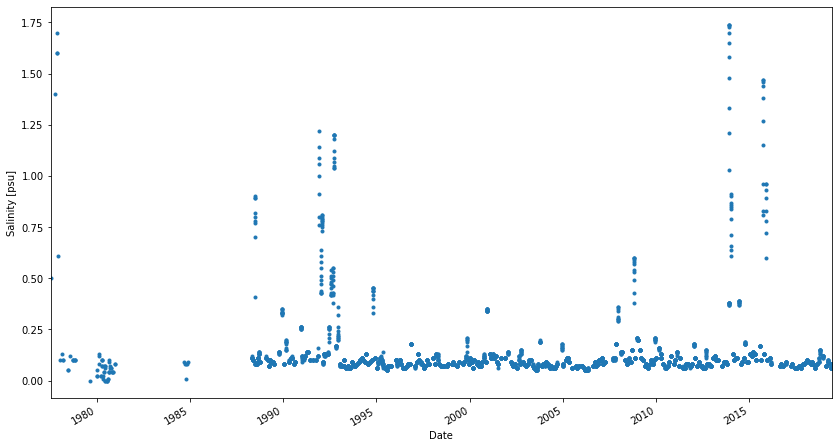

Station: 657
Changes in Temperature by year


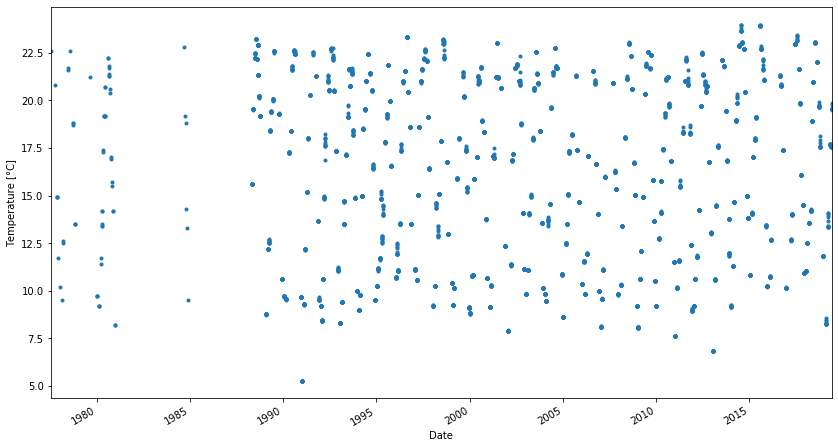

Station: 18
Changes in Salinity by year


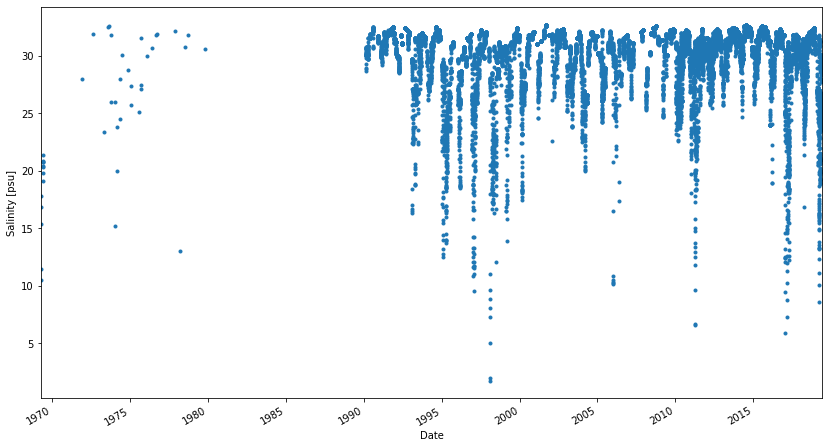

Station: 18
Changes in Temperature by year


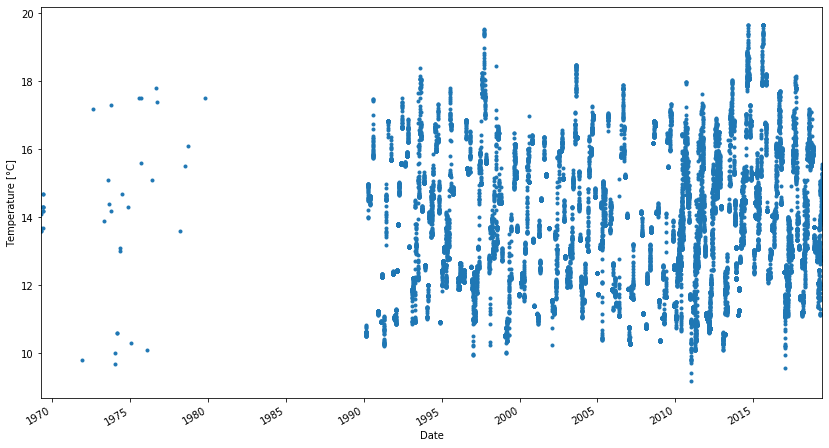

Station: 36
Changes in Salinity by year


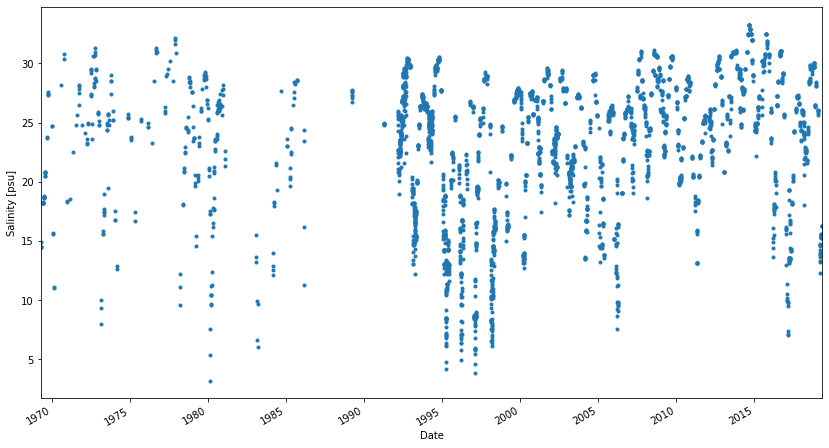

Station: 36
Changes in Temperature by year


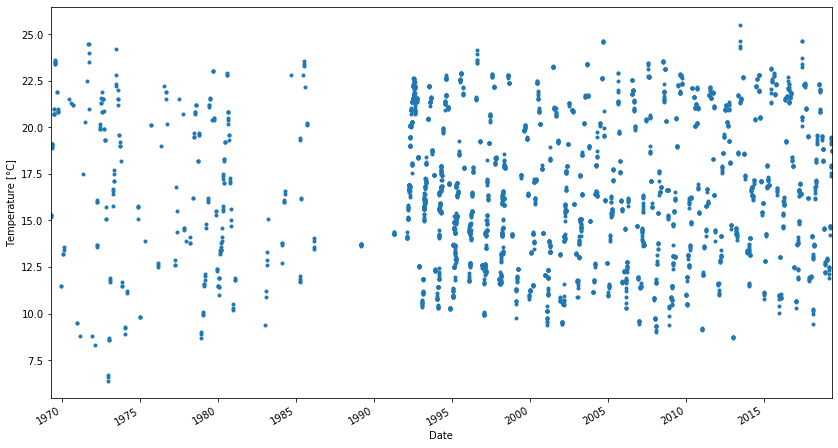

In [33]:
# For three stations, plot Salinity and Temperature across all years sampled
# The stations are 657 at the Sacramento River, 18 at the Golden Gate, 
# and 36 at San Jose

stations = ['657', '18', '36']
for station in stations:

    # Extract only records for this station
    st_df = wq_df[wq_df['Station'] == station]
       
    cols = ['Salinity', 'Temperature'] 
    for col in cols:

        # Extract rows where col is not NaN
        d = st_df.loc[st_df[col].notnull()]
        s=d[col] # The column we want to look at 

        if(s.size < 10):
            print("Not enough data to compute statistics: count =", s.size)
            continue

        print("Station:", station)
        print("Changes in", col, "by year")

        # plot this column's values by date
        d1 = d.loc[:, ['DateTime', col]]

        plot_one_var(d1, col)
           
    #end
    
#end

Note that the scale for salinity for station 657(above) is very different from the scale used for stations 18 and 36. If we used the same (0,30) scale for all three, no changes in salinity would be visible for station 657, as all values are between 0 and 2 ppt.

Station: 657
Changes in Salinity by year


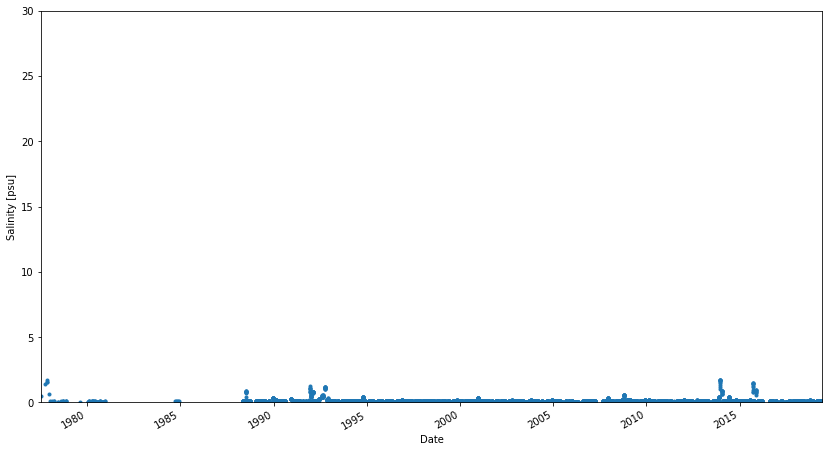

In [34]:
# Extract only records for station 657
station = '657'
st_df = wq_df[wq_df['Station'] == station]
       
col = 'Salinity' 

# Extract rows where col is not NaN
d = st_df.loc[st_df[col].notnull()]
s=d[col] # The column we want to look at 

print("Station:", station)
print("Changes in", col, "by year")

# plot this column's values by date
d1 = d.loc[:, ['DateTime', col]]

plot_one_var(d1, col, ylim=(0,30))
           


### Can you compare two related quantities?

How does chlorophyll compare to oxygen?

How does biovolume compare to
   * Chlorophyll
   * Oxygen
   * Nitrite (and other nutrients)

Hypothesis:
   * O2 should increase with chlorophyll increase
   * Chlorophyll should increase with biovolume increase
   * Nutrients should decrease with biovolume increase (consumed)


In [35]:
tmp_df = wq_df[['Calculated Chlorophyll', 'Calculated Oxygen', 
                'Nitrite', 'Nitrate + Nitrite', 'Ammonium', 
                'Phosphate', 'Silicate', 
                'Biovolume']]


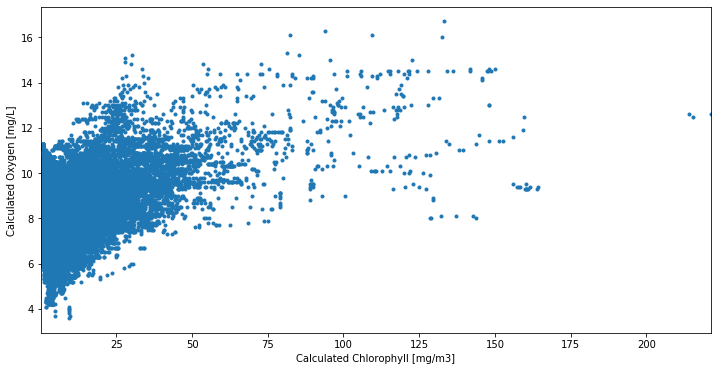

In [36]:
o2_df = tmp_df[(tmp_df['Calculated Chlorophyll'].notnull()) & 
                (tmp_df['Calculated Oxygen'].notnull())
               ]

ax = o2_df.plot(y='Calculated Oxygen', x='Calculated Chlorophyll', 
                figsize=(12,6), linestyle='none', marker='.', 
                legend=False)

xlabel='Calculated Chlorophyll' + ' ' + wq_units['Calculated Chlorophyll']
ax.set_xlabel(xlabel)

ylabel='Calculated Oxygen' + ' ' + wq_units['Calculated Oxygen']
ax.set_ylabel(ylabel)
plt.show()


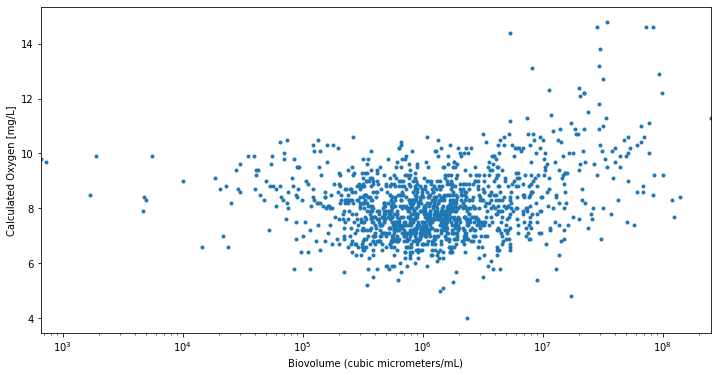

In [37]:
o2b_df = tmp_df[(tmp_df['Biovolume'].notnull()) & 
                (tmp_df['Calculated Oxygen'].notnull())
               ]

ax = o2b_df.plot(y='Calculated Oxygen', x='Biovolume', 
                figsize=(12,6), linestyle='none', marker='.', 
                legend=False, logx=True, )

xlabel='Biovolume' + ' ' + wq_units['Biovolume']
ax.set_xlabel(xlabel)

ylabel='Calculated Oxygen' + ' ' + wq_units['Calculated Oxygen']
ax.set_ylabel(ylabel)
plt.show()


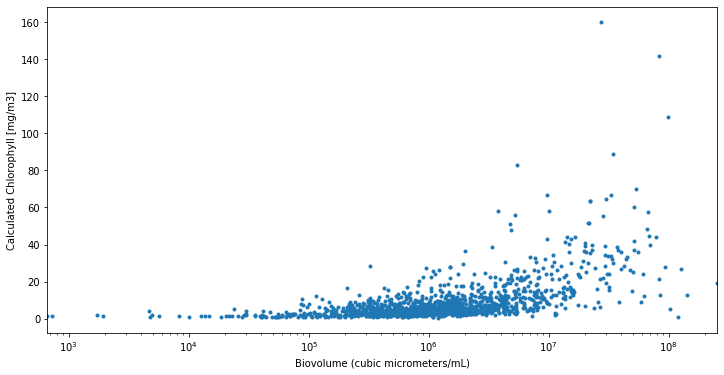

In [38]:
biov_df = tmp_df[(tmp_df['Calculated Chlorophyll'].notnull()) & 
                (tmp_df['Biovolume'].notnull())
               ]
ax = biov_df.plot(y='Calculated Chlorophyll', x='Biovolume', 
                  figsize=(12,6), linestyle='none', marker='.', 
                  logx=True, legend=False)

ylabel='Calculated Chlorophyll' + ' ' + wq_units['Calculated Chlorophyll']
ax.set_ylabel(ylabel)

xlabel='Biovolume' + ' ' + wq_units['Biovolume']
ax.set_xlabel(xlabel)


plt.show()


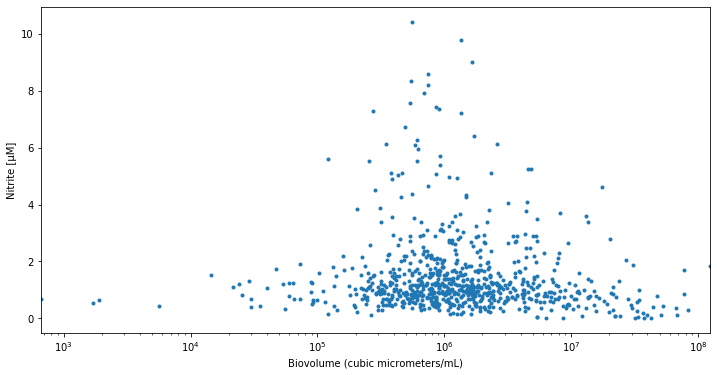

In [39]:
phos_df = tmp_df[(tmp_df['Biovolume'].notnull()) & 
                (tmp_df['Nitrite'].notnull())
               ]
ax = phos_df.plot(x='Biovolume', y='Nitrite', figsize=(12,6),
            linestyle='none', marker='.', legend=False, logx=True, )

xlabel='Biovolume' + ' ' + wq_units['Biovolume']
ax.set_xlabel(xlabel)

ylabel='Nitrite' + ' ' + wq_units['Nitrite']
ax.set_ylabel(ylabel)

plt.show()


In [40]:
tmp2_df = wq_df[['Nitrite', 'Nitrate + Nitrite', 'Ammonium', 
                'Phosphate', 'Silicate', 
                'Biovolume']]


In [41]:
nut_df = tmp2_df[(tmp2_df['Biovolume'].notnull()) &
                (
                 tmp2_df['Nitrite'].notnull() |
                 tmp2_df['Nitrate + Nitrite'].notnull() |
                 tmp2_df['Ammonium'].notnull() |
                 tmp2_df['Phosphate'].notnull() |
                 tmp2_df['Silicate'].notnull()
                )]

nut_df.head(10)

,Nitrite,Nitrate + Nitrite,Ammonium,Phosphate,Silicate,Biovolume
41440,0.84,21.50,6.20,2.21,91.81,181762.0
41686,1.36,67.42,10.92,7.54,117.88,419870.0
42522,0.10,0.01,0.15,3.00,1.47,24129101.0
42608,0.85,22.70,0.33,6.33,17.78,77610339.0
43205,0.41,8.40,1.42,1.51,107.23,4321195.0
43523,0.47,14.50,3.31,1.36,275.42,347837.0
44867,0.64,12.20,4.01,2.10,63.89,857023.0
45033,0.93,22.81,3.45,7.10,87.58,1566913.0
45078,0.83,23.17,0.57,7.88,90.62,1862745.0
45122,1.61,58.28,0.68,13.89,106.44,1052111.0


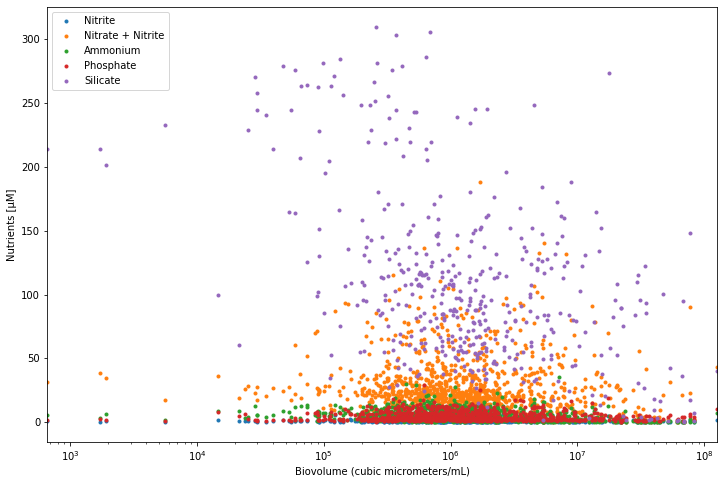

In [42]:
ax = nut_df.plot(x='Biovolume', figsize=(12,8),
            linestyle='none', marker='.', logx=True)

xlabel='Biovolume' + ' ' + wq_units['Biovolume']
ax.set_xlabel(xlabel)

# All nutrients use the same units
ylabel='Nutrients' + ' ' + wq_units['Nitrite']
ax.set_ylabel(ylabel)

plt.show()


### What else?

**Looking at the plots, what are some insights you can make? Do you see any correlations?**

**Salinity**

Salinity is lowest in the Sacramento River. It climbs steadily as the water heads through Suisun Bay and San Pablo Bay and peaks in the Central Bay at the Golden Gate. Salinity then remains high south to San Jose.

Maximum salinity doesn't change much between winter and summer. Minimum salinity, however, is much lower in the winter months, probably due to rain and storms.

Minimum salinity is always highest at stations 18, 19, and 20, just inside the Golden Gate.

**Changes by year**

The plots for three stations over 40 years show that temperature varies considerably, but more likely by depth and month than by station. I could dig deeper into this.

Salinity differences are very clear between these three stations and the differences are consistent from year to year.

**Phytoplankton**

As nutrients increase, phytoplankton biovolume increases as well. However, as biovolume continues to increase, nutrients begin to decrease as they are consumed.

Similarly, as phytoplankton increase, so do chlorophyll and calculated oxygen.

**Is there a hypothesis you’d like to investigate further? What other questions do the insights lead you to ask?**

I should look closer at stations 12.5 and 28.5. Salinity shows an unexpected dip during the winter months. Do any other parameters have unexpected levels compared to stations nearby?

Does biovolume vary more obviously with one of the nutrients vs any of the others? In summer months vs winter? At stations closer to the river or further south? I can also look at biovolume compared to salinity, temperature, or O2. 

I would like to do more station by station plots, as the USGS has done in their [<i>Nature</i> article](https://www.nature.com/articles/sdata201798).

I would like to compare biovolume or O2 to SPM (suspended particulate matter) and also determine SM by station. Are parts of the Bay "murkier" than others? How does the extinction coefficient (light attenuation) relate to SPM? To biovolume?